# Research 04: JSON Output Configuration

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from pathlib import Path
from PIL import Image
from dotenv import load_dotenv
import google.generativeai as genai
import typing_extensions as typing

In [3]:
load_dotenv()

GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

In [4]:
genai.configure(api_key=GEMINI_API_KEY)

In [5]:
"""
{
    "name": "abc",
    "contact": "xxx-xxxx-xxx",
    "email": "candidate@job.apply",
    "ats_score": "95%",
    "final_thoughts": "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy 
    text ever since the 1500s."
}
"""

class Resume_Evaluation(typing.TypedDict):
    candidate_name: str
    candidate_contact: str
    candidate_email: str
    ats_score: str
    final_thoughts: str
    

model_n = 'gemini-1.5-flash'

system_instruction = """
You are an experienced Technical Human Resource Manager. Your task is to review the provided resume/CV against the job description. 

Evaluate the candidate for the job based on the provided resume/CV. And extract the candidate contact details from resume/CV also, so that further HR executive can contact to candidate.

Your evaluation should include:
1. A percentage match between the resume and the job description.
2. Candidate details, like Name, contact, email.
3. Final thoughts on the candidate's suitability for the position.
"""

generation_config = {
    'response_mime_type':'application/json',
    'response_schema': list[Resume_Evaluation]
}

model = genai.GenerativeModel(model_n, system_instruction=system_instruction, generation_config=generation_config)

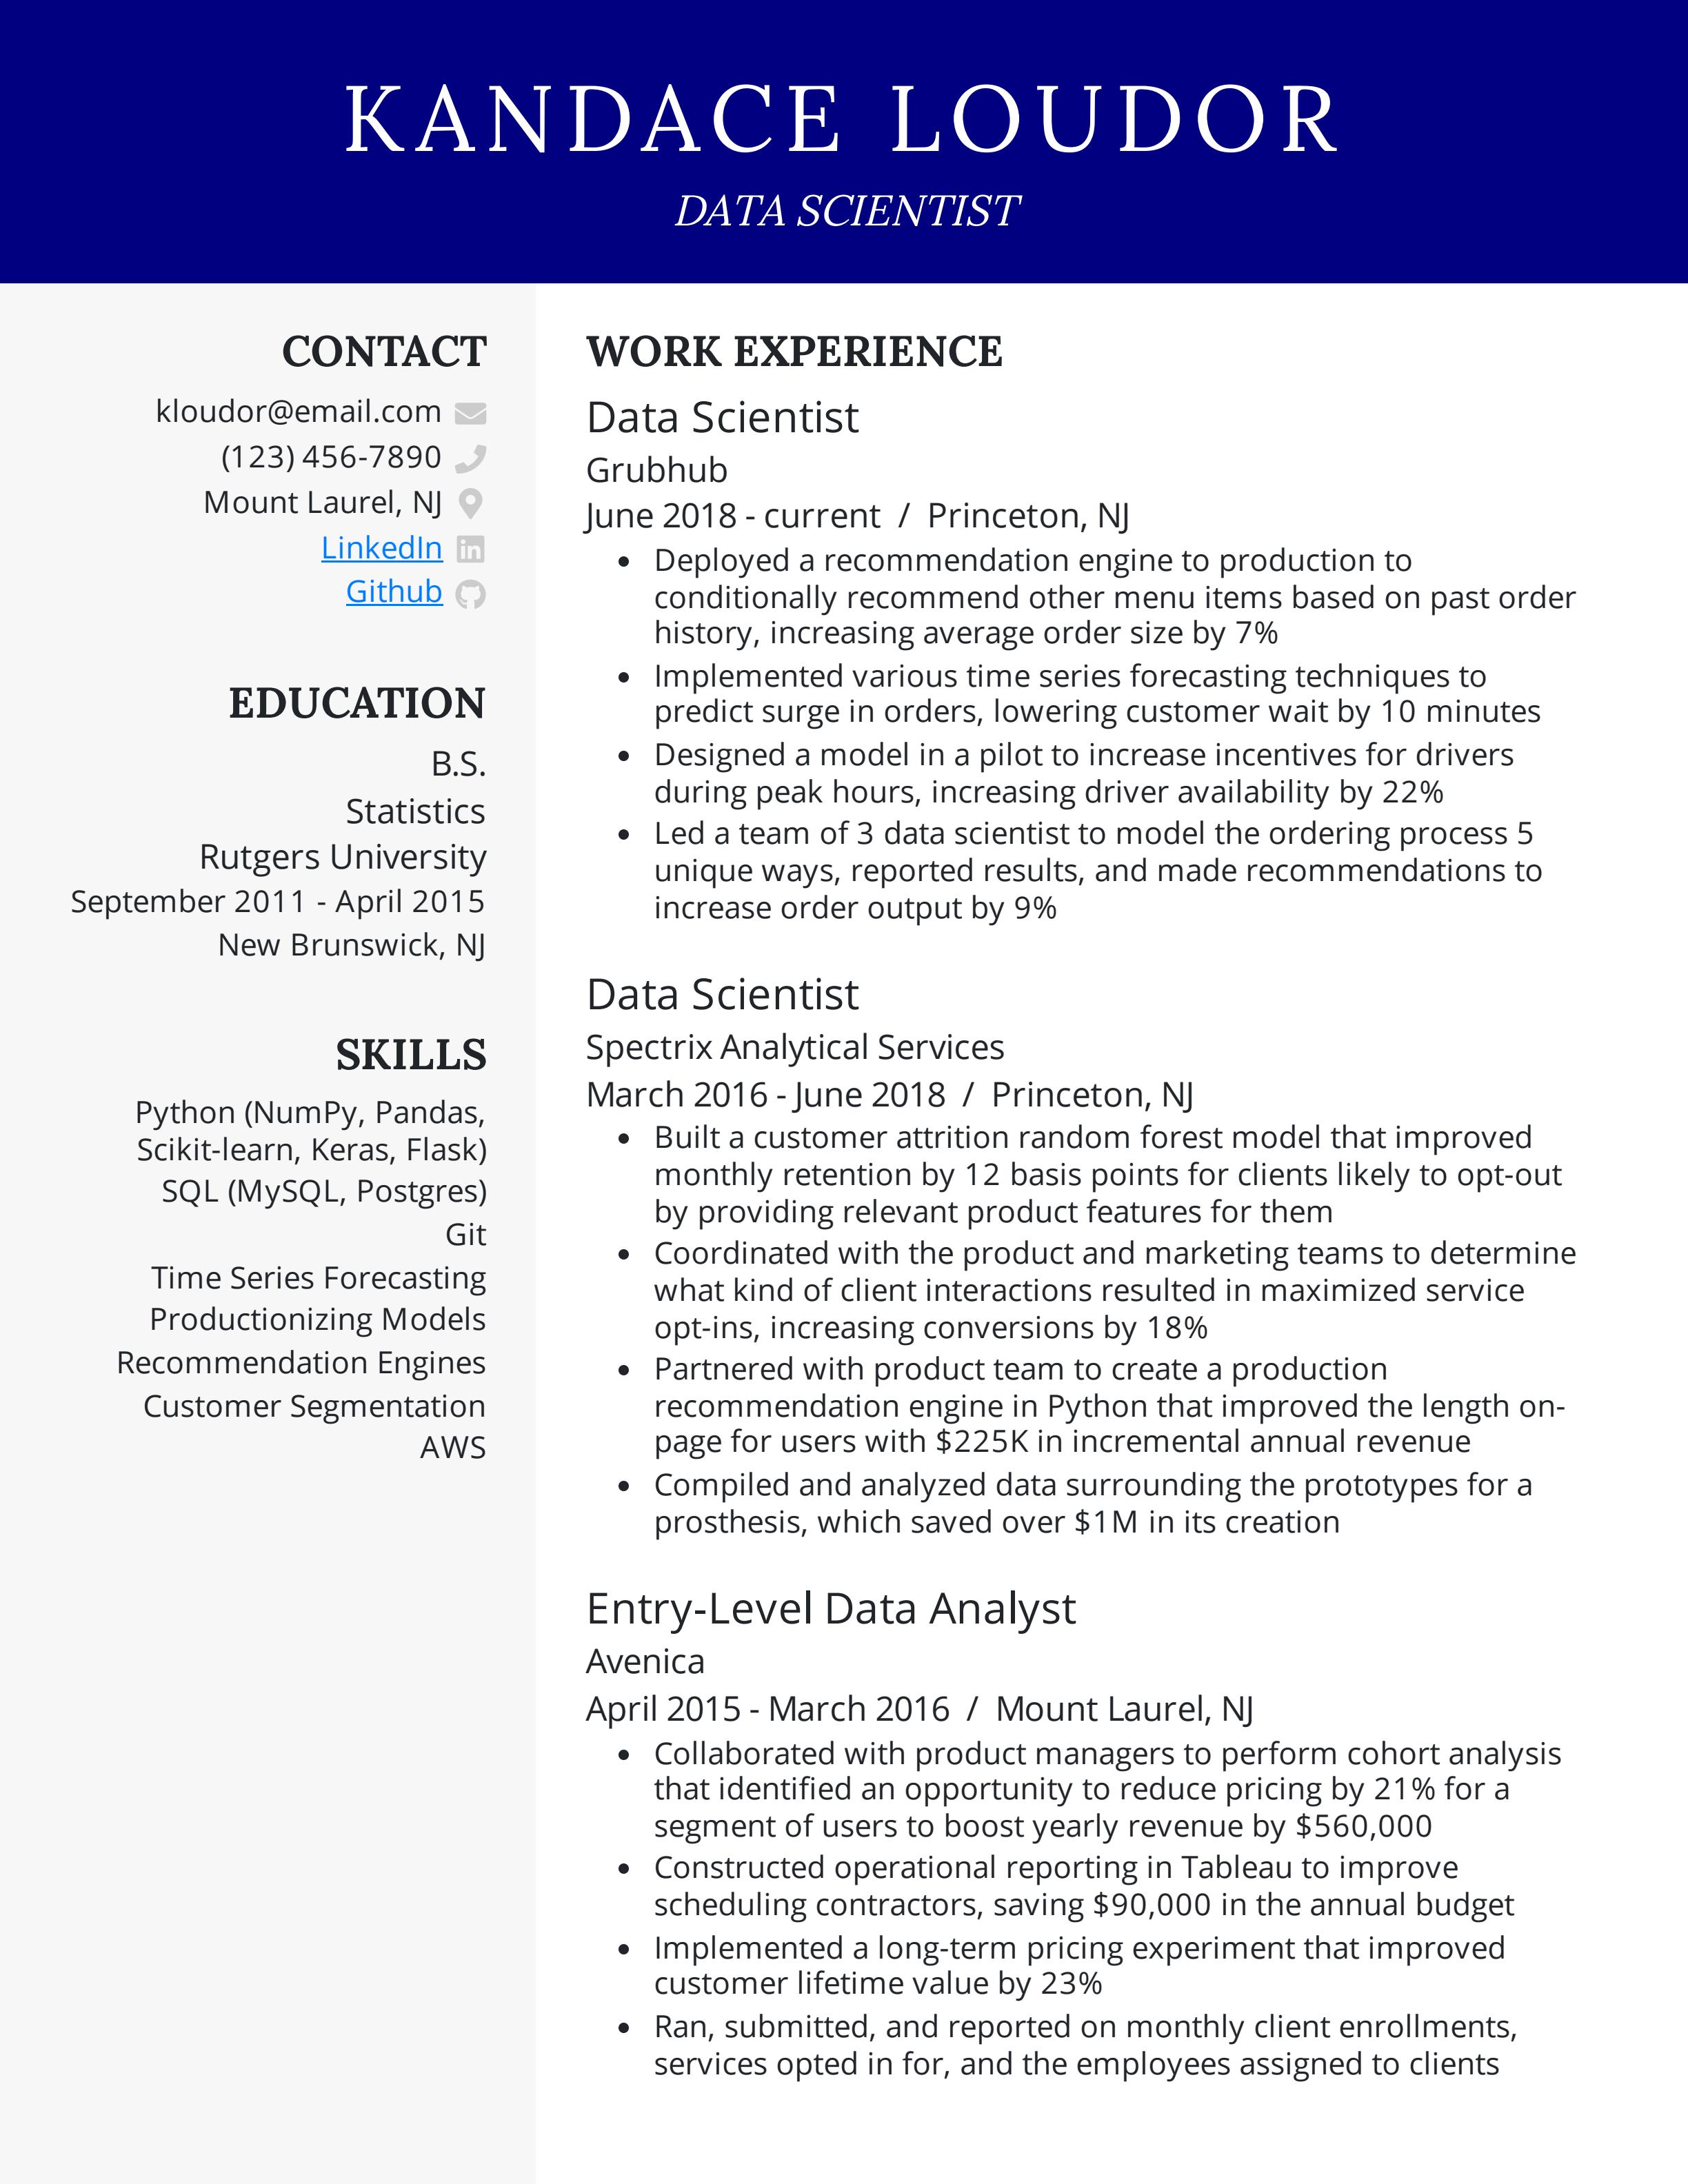

In [6]:
img_path = "pdf2images\Resume3\image0.jpg"
img = Image.open(img_path)
img

In [7]:
DS_JD = """
### Job Title: Data Scientist

#### Job Description:

We are seeking a skilled and motivated Data Scientist to join our team. The ideal candidate will have a strong background in data analysis, statistical modeling, and machine learning. This role involves working with large datasets, developing predictive models, and providing actionable insights to drive business decisions.

#### Key Responsibilities:
- Collect, process, and analyze large datasets from various sources.
- Develop and implement statistical models and machine learning algorithms.
- Perform exploratory data analysis to identify trends and patterns.
- Create data visualizations and dashboards to communicate findings.
- Collaborate with cross-functional teams to define data requirements and deliver solutions.
- Conduct A/B testing and other experiments to evaluate model performance.
- Stay up-to-date with the latest industry trends and technologies in data science and analytics.

#### Required Skills and Qualifications:
- Bachelor’s degree in Computer Science, Statistics, Mathematics, or a related field. Master’s degree preferred.
- Proven experience as a Data Scientist or in a similar role.
- Proficiency in programming languages such as Python or R.
- Strong knowledge of statistical methods and machine learning techniques.
- Experience with data visualization tools like Tableau, Power BI, or similar.
- Familiarity with big data technologies such as Hadoop, Spark, or similar.
- Excellent problem-solving skills and attention to detail.
- Strong communication and collaboration skills.

#### Preferred Qualifications:
- Experience with deep learning frameworks such as TensorFlow or PyTorch.
- Knowledge of SQL and experience with relational databases.
- Understanding of cloud platforms like AWS, Azure, or Google Cloud.
- Background in a specific industry (e.g., finance, healthcare, marketing).

#### Benefits:
- Competitive salary and performance bonuses.
- Comprehensive health, dental, and vision insurance.
- Flexible working hours and remote work options.
- Professional development opportunities and continuing education.
- Collaborative and innovative work environment.

#### How to Apply:
Please submit your resume and cover letter outlining your relevant experience and why you are a great fit for this position. 

We look forward to reviewing your application!
"""

In [8]:
response = model.generate_content([DS_JD, img])

print(response.text)

{"percentage_match": 85, "candidate_details": {"name": "Kandace Loudor", "contact": "(123) 456-7890", "email": "kloudor@email.com"}, "final_thoughts": "Kandace Loudor is a strong candidate for the Data Scientist position. She has a solid background in data science and analytics, with experience in both statistical modeling and machine learning. Her work experience at Grubhub and Spectrix Analytical Services demonstrates her ability to develop and implement predictive models that drive business outcomes. She has also proven her skills in data visualization and communication. While she doesn't have direct experience with deep learning or cloud platforms, her expertise in Python and other relevant tools suggests she can quickly adapt to these technologies. Overall, Kandace is a highly qualified candidate with the potential to make a significant contribution to the team."}



In [18]:
result = eval(response.text)
result

{'percentage_match': '75%',
 'candidate_details': {'name': 'Kandace Loudor',
  'contact': '(123) 456-7890',
  'email': 'kloudor@email.com'},
 'final_thoughts': 'Kandace Loudor is a strong candidate for the Data Scientist position. She has a solid background in data science with experience in various relevant areas such as time series forecasting, recommendation engines, and customer segmentation. Her skills and experience align well with the job requirements, particularly her proficiency in Python, SQL, and statistical modeling. However, her resume lacks experience with deep learning frameworks like TensorFlow or PyTorch, which is a preferred qualification for this role. Overall, Kandace is a qualified candidate who would be worth interviewing further to assess her suitability for the position and discuss her potential to expand her skillset in deep learning.'}